## TITANIC SURVIVAL PREDICTION CLASSIFICATION PROJECT

### PROJECT GOAL:
#### The goal of this project is to build a classification model  that predicts whether a passenger on the titanic survived or not.

In [242]:
#IMPORTING ALLTHE REQUIRED LIBRARIES.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [243]:
import warnings
warnings.filterwarnings('ignore')

### LOADING THE DATASET

In [244]:
dataset = pd.read_csv(r"C:\Users\India\Downloads\Titanic datsaset folder\Titanic dataset.csv")

In [245]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### EDA (EXPLORATORY DATA ANALYSIS)

### STEP-1

### UNDERSTANDING THE DATASET

In [5]:
dataset.shape#there are 418 rows & 12 columns

(418, 12)

In [6]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
dataset.head() #gives the top 5 observations of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### STEP-2

### DATA CLENAING

### REMOVING UNWANTED COLUMNS

In [106]:
dataset.drop(columns=["PassengerId","Name","Ticket"] , inplace=True)

In [107]:
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,34.5,0,0,7.8292,NaN,Q
1,1,3,female,47.0,1,0,7.0000,NaN,S
2,0,2,male,62.0,0,0,9.6875,NaN,Q
3,0,3,male,27.0,0,0,8.6625,NaN,S
4,1,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,NaN,S
414,1,1,female,39.0,0,0,108.9000,C105,C
415,0,3,male,38.5,0,0,7.2500,NaN,S
416,0,3,male,NaN,0,0,8.0500,NaN,S


In [12]:
dataset.shape

(418, 9)

## HANDLING MISSING VALUES

In [108]:
# checking for missing values in the dataset
dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [109]:
dataset['Age'].replace(np.nan, dataset['Age'].mean(), inplace=True)
dataset['Fare'].replace(np.nan, dataset['Fare'].mean(), inplace=True)

In [110]:
dataset.drop('Cabin', axis=1,inplace=True)

In [111]:
dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [17]:
dataset.shape

(418, 8)

### HANDLING OUTLIERS

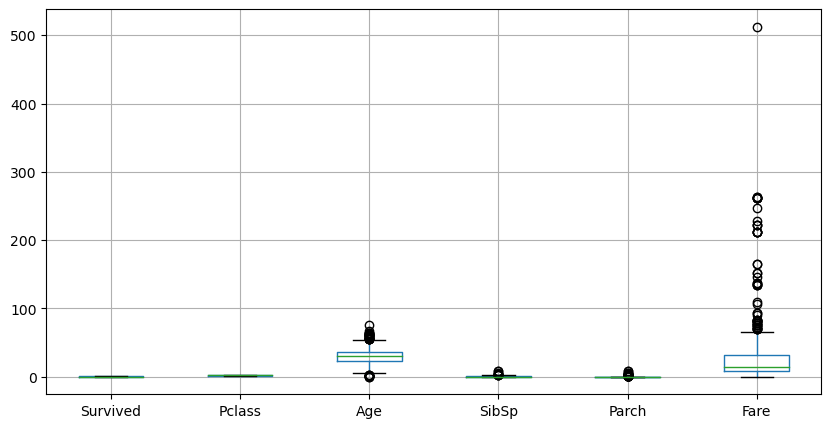

In [18]:
dataset.boxplot(figsize=(10,5))
plt.show()

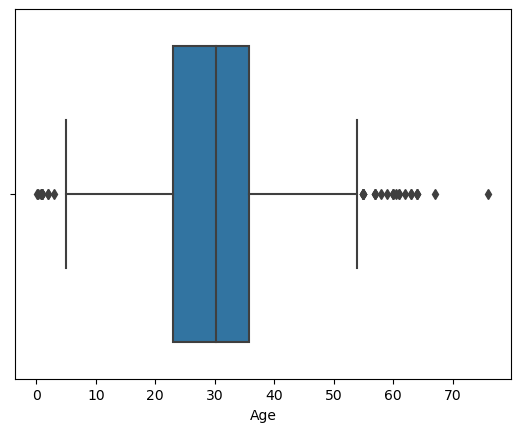

In [19]:
sns.boxplot(dataset["Age"])
plt.show()

In [20]:
#NO NEED TO HANDLE OUTLIERS IN THE "AGE"  COLUMN,BECAUSE AGE HAVING IN BETWEEEN 60 AND 70 IS NOT CONSIDERABEL AS OUTLIER.

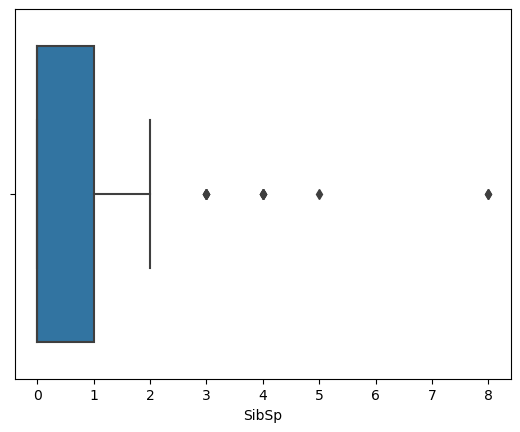

In [21]:
sns.boxplot(dataset["SibSp"])
plt.show()

In [22]:
#NO NEEED TO HANDLE OUTLIERS IN THIS "SIBSP"  COLUMNN ALSO
#Sibsp value of 8 were likely part of large families travelling together. Large families did exist
#So, "SibSp" value of 8 is not consider as outlier.

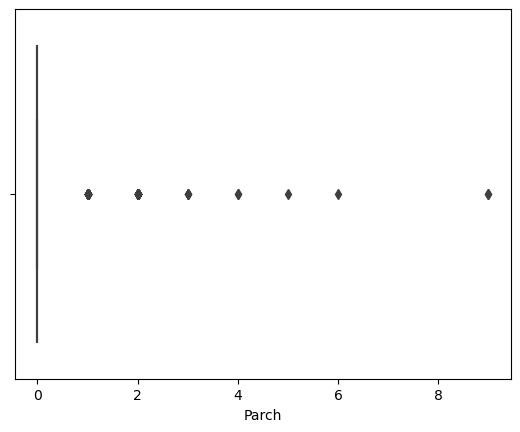

In [23]:
sns.boxplot(dataset["Parch"])
plt.show()

In [24]:
#NO NEED TO HANDLE OUTLIERS IN "PARCH"  COLUMNS ALSO, BEACUSE A PASSENGER CAN MIGHT LARGE FAMILIES SO HAVING 8-9 CHILDREN ALSO CONSIDERABLE.

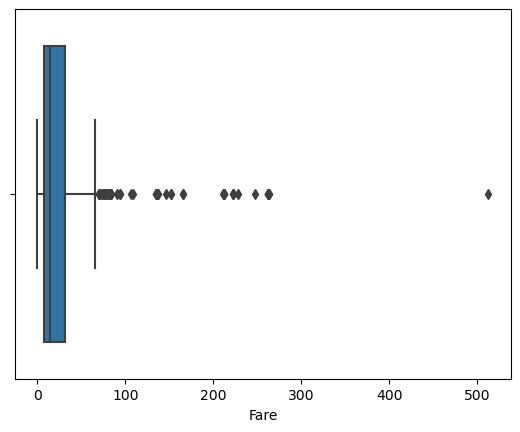

In [112]:
sns.boxplot(dataset["Fare"])
plt.show()

In [113]:
dataset["Fare"].max()

512.3292

In [114]:
#WE CAN CLEARLY OBSERVE THAT THERE IS ONE OUTLIER WHICH IS FAR AWAY FROM THE REGULAR DATAPOINTS,SO WE HAVE TO HANDLE THE OUTLIER.

In [115]:
q1= dataset["Fare"].quantile(q=0.25)
q1

7.8958

In [116]:
q3= dataset["Fare"].quantile(q=0.75)
q3

31.5

In [117]:
iqr=q3-q1
iqr

23.6042

In [118]:
lower_boundary = q1 - (1.5 * iqr)

In [119]:
lower_boundary

-27.5105

In [120]:
upper_boundary=q3  +  ( 1.5 * iqr)

In [121]:
upper_boundary

66.9063

In [122]:
dataset[dataset["Fare"]< lower_boundary]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [123]:
df = dataset[dataset["Fare"] >  upper_boundary]

In [124]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
12,1,1,female,23.00000,1,0,82.2667,S
24,1,1,female,48.00000,1,3,262.3750,C
48,1,1,female,60.00000,0,0,76.2917,C
53,1,1,female,28.00000,3,2,263.0000,S
59,1,1,female,36.00000,0,0,262.3750,C
64,0,1,male,13.00000,2,2,262.3750,C
69,1,1,female,60.00000,1,4,263.0000,S
74,1,1,female,35.00000,0,0,211.5000,C
75,0,1,male,32.50000,0,0,211.5000,C
81,0,1,male,67.00000,1,0,221.7792,S


In [125]:
df["Fare"].max()#we have  to handle this value.

512.3292

In [126]:
upper_outliers=dataset[(dataset["Fare"]>300)]

In [127]:
upper_outliers

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
343,1,1,female,58.0,0,1,512.3292,C


In [128]:
replace_dict={}
for idx,row in upper_outliers.iterrows():
    if (row["Fare"] - upper_boundary)  < 1000:
        replace_dict[row["Fare"]]= 263.0000

In [129]:
replace_dict

{512.3292: 263.0}

In [130]:
dataset.replace(replace_dict,inplace= True)

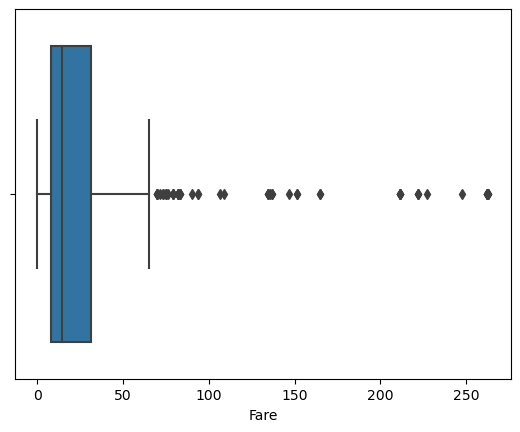

In [131]:
sns.boxplot(dataset["Fare"])
plt.show()

In [132]:
dataset["Fare"].max()

263.0

In [133]:
dataset# A DATASET WITH NO OUTLIERS AND MISSING VALUES.

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.50000,0,0,7.8292,Q
1,1,3,female,47.00000,1,0,7.0000,S
2,0,2,male,62.00000,0,0,9.6875,Q
3,0,3,male,27.00000,0,0,8.6625,S
4,1,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,30.27259,0,0,8.0500,S
414,1,1,female,39.00000,0,0,108.9000,C
415,0,3,male,38.50000,0,0,7.2500,S
416,0,3,male,30.27259,0,0,8.0500,S


## VISUALIZATION


In [47]:
dataset.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q


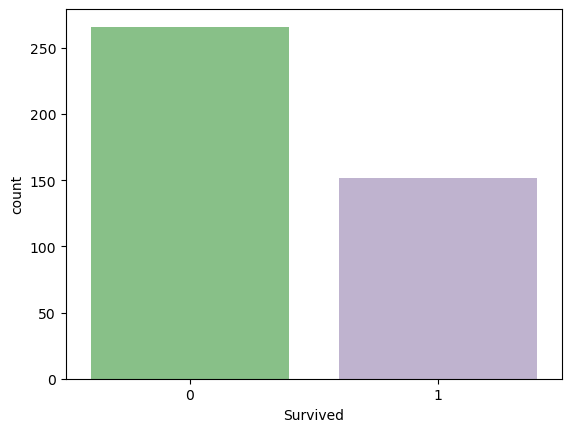

In [134]:
sns.countplot(dataset["Survived"],palette='Accent')
plt.show()

Countplots  are used to represent the frequency or distribution of categorical data.

OBSERVATION:-

The no. of passengers who are survived are less than the  passengers who are died.

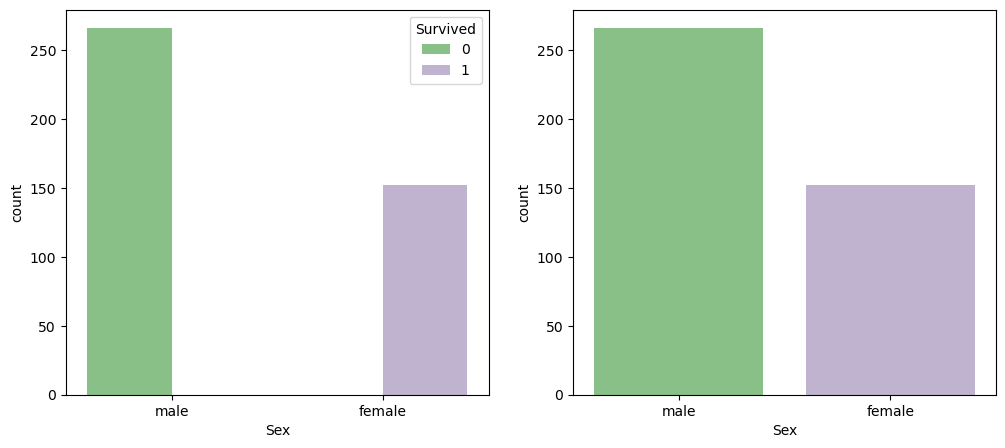

In [135]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(dataset["Sex"],hue=dataset["Survived"],palette='Accent')
#plt.show()


plt.subplot(1,2,2)
sns.countplot(dataset["Sex"],palette='Accent')
plt.show()

The graph shows all of the females  are survived the disaster and all of the males are not survived(dead).

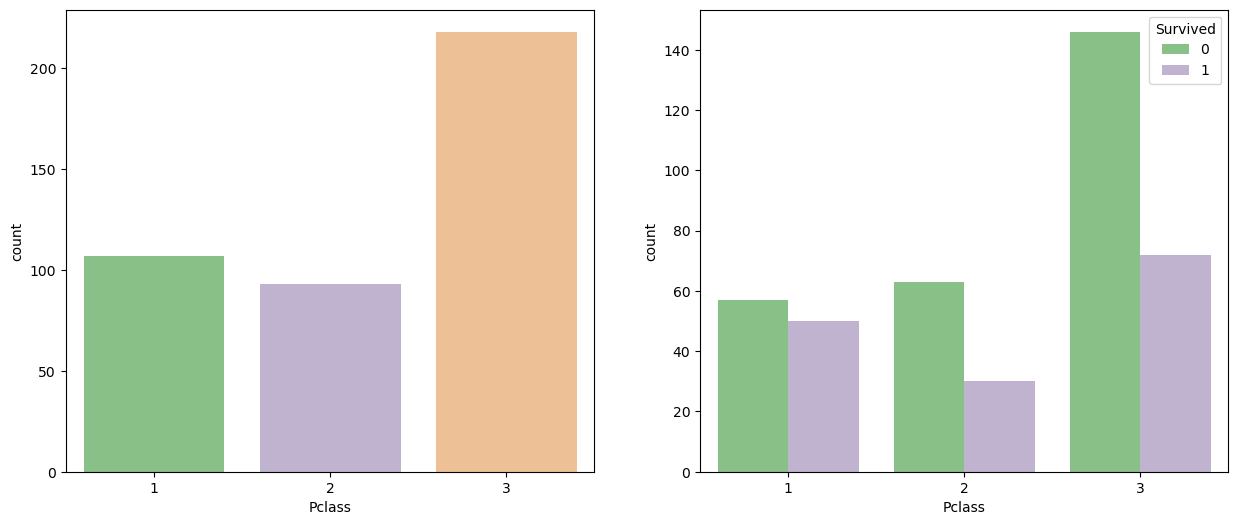

In [50]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)

sns.countplot(dataset["Pclass"],palette='Accent')

plt.subplot(1,2,2)
sns.countplot(dataset["Pclass"],hue=dataset["Survived"],palette='Accent')
plt.show()

Most of the passengers are belonging to Class-3.

The passengers who are not survived are higher in class 2 & 3


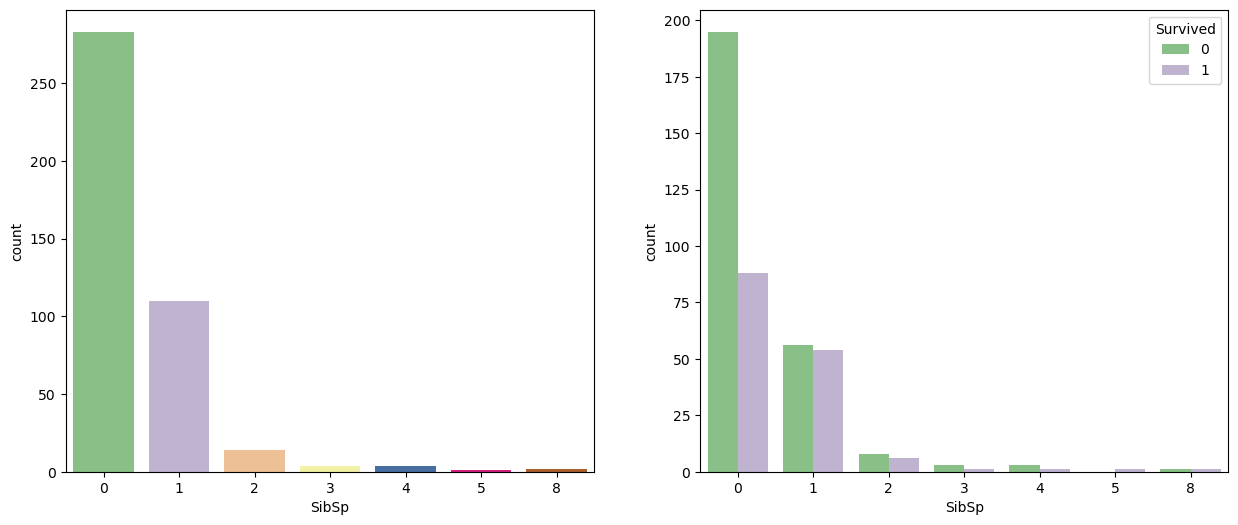

In [51]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)

sns.countplot(dataset["SibSp"],palette='Accent')

plt.subplot(1,2,2)
sns.countplot(dataset["SibSp"],hue=dataset["Survived"],palette='Accent')
plt.show()

Single passengers (means travelling alone) are in high number when compared to other passengers who are travelling with their siblings or spouses.

Single passengers with no siblings or spouses have less chance to survival.

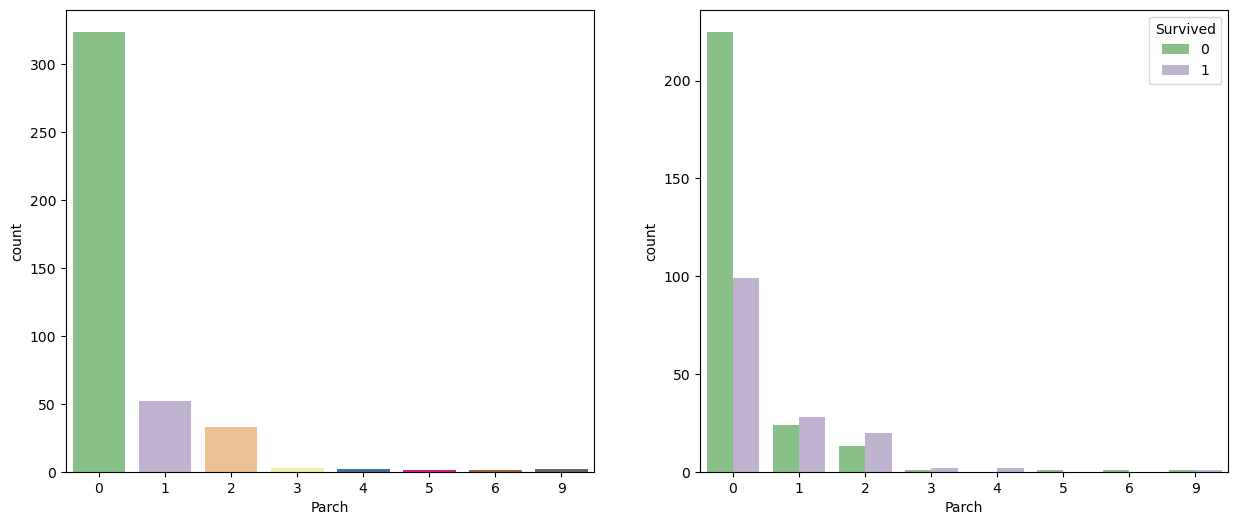

In [52]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)

sns.countplot(dataset["Parch"],palette='Accent')

plt.subplot(1,2,2)
sns.countplot(dataset["Parch"],hue=dataset["Survived"],palette='Accent')
plt.show()

Here also, Single Passengers are high in number when compared to other passengers who are travelling with their parents and children's.

Single passengers with no parents and childrens have less chance to survival.

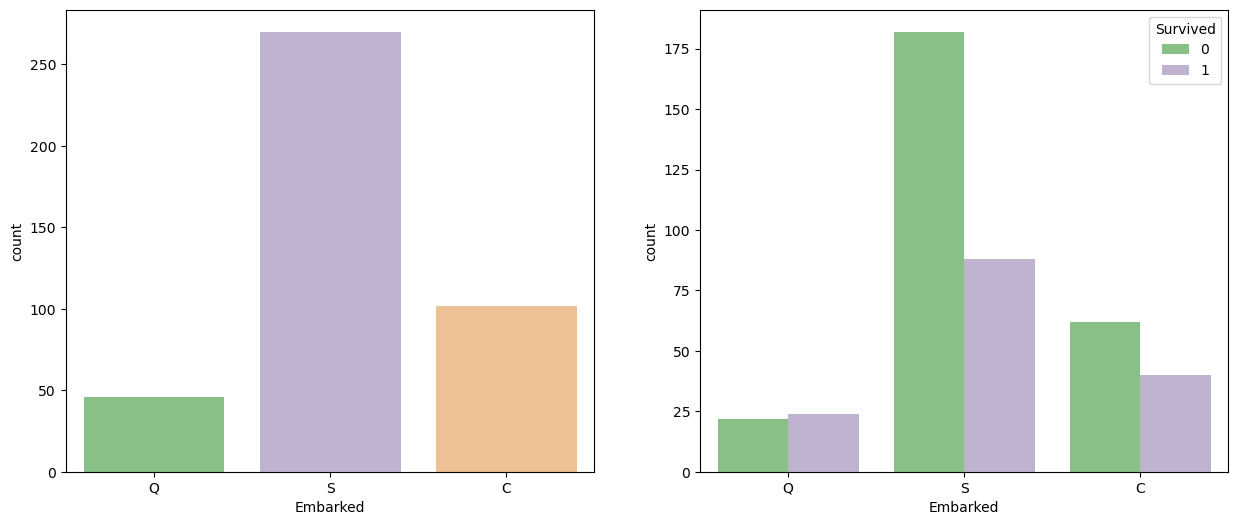

In [53]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)

sns.countplot(dataset["Embarked"],palette='Accent')

plt.subplot(1,2,2)
sns.countplot(dataset["Embarked"],hue=dataset["Survived"],palette='Accent')
plt.show()

Most of the passengers are Embarked from Southampton.


The passengers who embarked  from Southampton have less chance of survival.


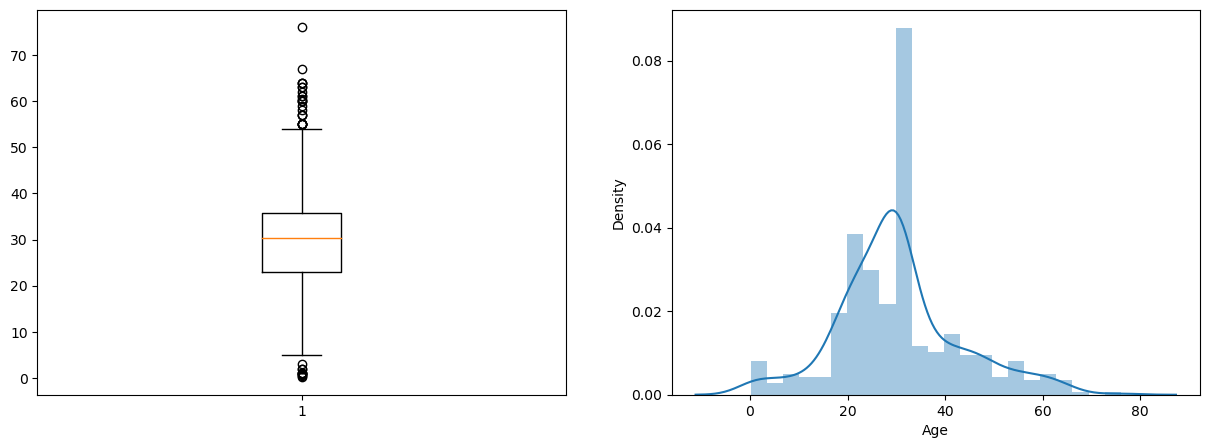

In [136]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

plt.boxplot(dataset["Age"],vert=True)

plt.subplot(1,2,2)
sns.distplot(dataset["Age"])
plt.show()

There are outliers present in "Age" column.

Most of the passengers were aged between 20-40 years.

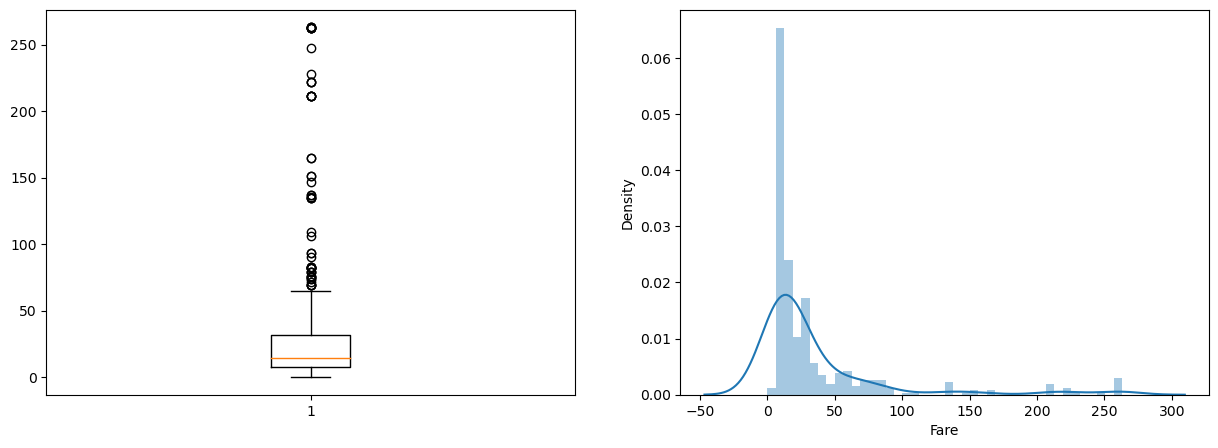

In [55]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

plt.boxplot(dataset["Fare"],vert=True)

plt.subplot(1,2,2)
sns.distplot(dataset["Fare"])
plt.show()

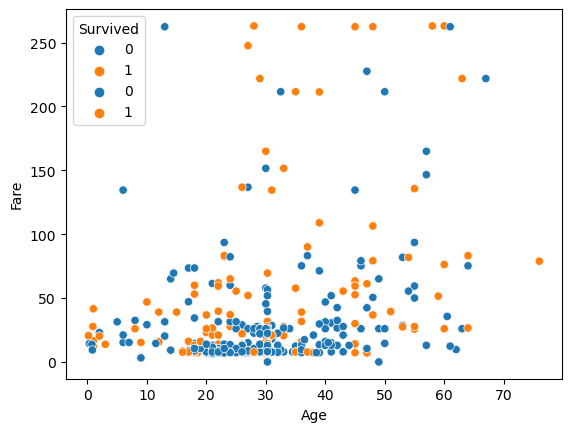

In [138]:
sns.scatterplot(dataset["Age"],dataset["Fare"],hue=dataset["Survived"])
plt.show()

The graph shows that the passengers with high fares had more chance of survival

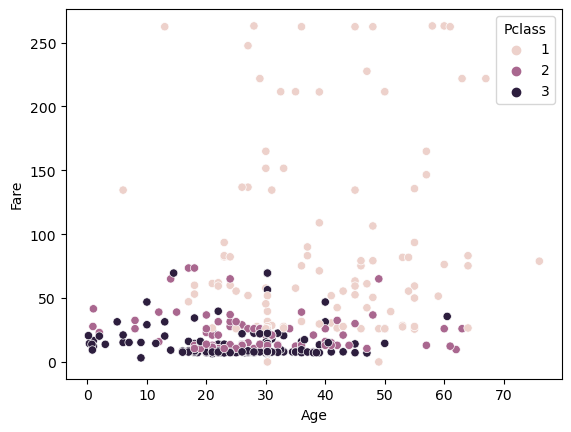

In [139]:
sns.scatterplot(dataset["Age"],dataset["Fare"],hue=dataset["Pclass"])
plt.show()

Passengers who belonged to 1st class are having very high Fare.

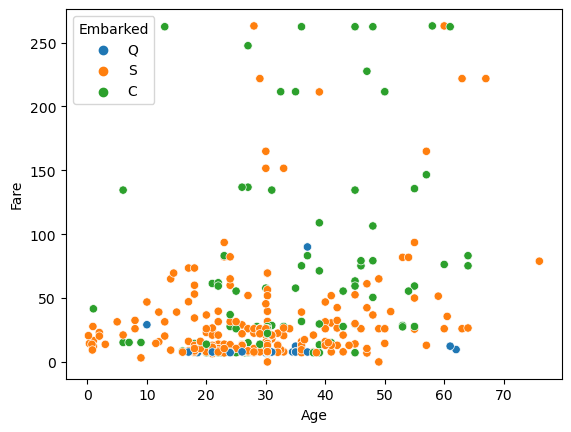

In [140]:
sns.scatterplot(dataset["Age"],dataset["Fare"],hue=dataset["Embarked"])
plt.show()

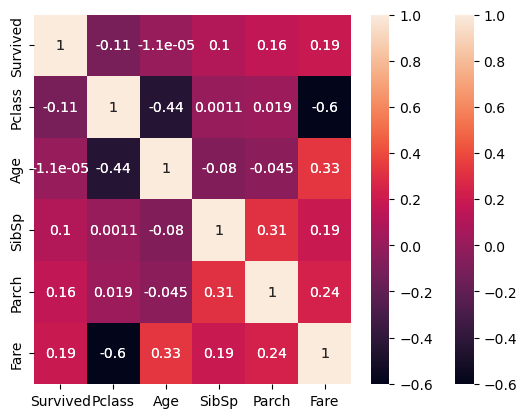

In [142]:
sns.heatmap(dataset.corr(),annot=True)
plt.show()

### ONE-HOT ENCODING

In [143]:
from sklearn.preprocessing import OneHotEncoder

In [144]:
from sklearn.compose import ColumnTransformer

In [145]:
oh = OneHotEncoder()

In [146]:
ct = ColumnTransformer(transformers = [("ohe",oh,["Sex","Embarked"])],remainder = "passthrough")

In [147]:
dataset = ct.fit_transform(dataset)

In [148]:
dataset

array([[ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  7.8292],
       [ 1.    ,  0.    ,  0.    , ...,  1.    ,  0.    ,  7.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  9.6875],
       ...,
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  7.25  ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  1.    ,  1.    , ...,  1.    ,  1.    , 22.3583]])

In [149]:
ct.get_feature_names_out()#to get the cols names we use the function c"ct.get_feature_names_out()""

array(['ohe__Sex_female', 'ohe__Sex_male', 'ohe__Embarked_C',
       'ohe__Embarked_Q', 'ohe__Embarked_S', 'remainder__Survived',
       'remainder__Pclass', 'remainder__Age', 'remainder__SibSp',
       'remainder__Parch', 'remainder__Fare'], dtype=object)

In [150]:
dataset= pd.DataFrame(dataset)# converting into dataframe

In [151]:
dataset

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,34.50000,0.0,0.0,7.8292
1,1.0,0.0,0.0,0.0,1.0,1.0,3.0,47.00000,1.0,0.0,7.0000
2,0.0,1.0,0.0,1.0,0.0,0.0,2.0,62.00000,0.0,0.0,9.6875
3,0.0,1.0,0.0,0.0,1.0,0.0,3.0,27.00000,0.0,0.0,8.6625
4,1.0,0.0,0.0,0.0,1.0,1.0,3.0,22.00000,1.0,1.0,12.2875
...,...,...,...,...,...,...,...,...,...,...,...
413,0.0,1.0,0.0,0.0,1.0,0.0,3.0,30.27259,0.0,0.0,8.0500
414,1.0,0.0,1.0,0.0,0.0,1.0,1.0,39.00000,0.0,0.0,108.9000
415,0.0,1.0,0.0,0.0,1.0,0.0,3.0,38.50000,0.0,0.0,7.2500
416,0.0,1.0,0.0,0.0,1.0,0.0,3.0,30.27259,0.0,0.0,8.0500


In [152]:
dataset.columns =ct.get_feature_names_out()#to get the col names  we used a functin  " ct.get_feature_names_out()"
                                   # we can see there are some unwanted nameslike oh__reminders eic..,,,in the colnames.

In [153]:
dataset

,ohe__Sex_female,ohe__Sex_male,ohe__Embarked_C,ohe__Embarked_Q,ohe__Embarked_S,remainder__Survived,remainder__Pclass,remainder__Age,remainder__SibSp,remainder__Parch,remainder__Fare
0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,34.50000,0.0,0.0,7.8292
1,1.0,0.0,0.0,0.0,1.0,1.0,3.0,47.00000,1.0,0.0,7.0000
2,0.0,1.0,0.0,1.0,0.0,0.0,2.0,62.00000,0.0,0.0,9.6875
3,0.0,1.0,0.0,0.0,1.0,0.0,3.0,27.00000,0.0,0.0,8.6625
4,1.0,0.0,0.0,0.0,1.0,1.0,3.0,22.00000,1.0,1.0,12.2875
...,...,...,...,...,...,...,...,...,...,...,...
413,0.0,1.0,0.0,0.0,1.0,0.0,3.0,30.27259,0.0,0.0,8.0500
414,1.0,0.0,1.0,0.0,0.0,1.0,1.0,39.00000,0.0,0.0,108.9000
415,0.0,1.0,0.0,0.0,1.0,0.0,3.0,38.50000,0.0,0.0,7.2500
416,0.0,1.0,0.0,0.0,1.0,0.0,3.0,30.27259,0.0,0.0,8.0500


In [154]:
column_name =[]
for each_col in ct.get_feature_names_out():
    print(each_col)#wecan see unwanted words in the col names
                     #so,by using split function we can get only country name.
    column_name.append(each_col.split("_")[-1])#spliting by "_"& getting the last elemrnt (-1)

ohe__Sex_female
ohe__Sex_male
ohe__Embarked_C
ohe__Embarked_Q
ohe__Embarked_S
remainder__Survived
remainder__Pclass
remainder__Age
remainder__SibSp
remainder__Parch
remainder__Fare


In [155]:
column_name

['female',
 'male',
 'C',
 'Q',
 'S',
 'Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare']

In [156]:
dataset.columns=column_name#giving col names

In [157]:
dataset# finally,thisis our dataset which is encoded with ohe techinque,,,,,,now we can use it in an mathematical formulas.
    

,female,male,C,Q,S,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,34.50000,0.0,0.0,7.8292
1,1.0,0.0,0.0,0.0,1.0,1.0,3.0,47.00000,1.0,0.0,7.0000
2,0.0,1.0,0.0,1.0,0.0,0.0,2.0,62.00000,0.0,0.0,9.6875
3,0.0,1.0,0.0,0.0,1.0,0.0,3.0,27.00000,0.0,0.0,8.6625
4,1.0,0.0,0.0,0.0,1.0,1.0,3.0,22.00000,1.0,1.0,12.2875
...,...,...,...,...,...,...,...,...,...,...,...
413,0.0,1.0,0.0,0.0,1.0,0.0,3.0,30.27259,0.0,0.0,8.0500
414,1.0,0.0,1.0,0.0,0.0,1.0,1.0,39.00000,0.0,0.0,108.9000
415,0.0,1.0,0.0,0.0,1.0,0.0,3.0,38.50000,0.0,0.0,7.2500
416,0.0,1.0,0.0,0.0,1.0,0.0,3.0,30.27259,0.0,0.0,8.0500


### SPLIT DATA INTO INDEPENDENT AND DEPENDENT VARIABLES.

In [158]:
X = dataset.drop("Survived" ,axis =1)## indepenent variable#WHICH REPRSNTS THE INPUTS

In [159]:
X

,female,male,C,Q,S,Pclass,Age,SibSp,Parch,Fare
0,0.0,1.0,0.0,1.0,0.0,3.0,34.50000,0.0,0.0,7.8292
1,1.0,0.0,0.0,0.0,1.0,3.0,47.00000,1.0,0.0,7.0000
2,0.0,1.0,0.0,1.0,0.0,2.0,62.00000,0.0,0.0,9.6875
3,0.0,1.0,0.0,0.0,1.0,3.0,27.00000,0.0,0.0,8.6625
4,1.0,0.0,0.0,0.0,1.0,3.0,22.00000,1.0,1.0,12.2875
...,...,...,...,...,...,...,...,...,...,...
413,0.0,1.0,0.0,0.0,1.0,3.0,30.27259,0.0,0.0,8.0500
414,1.0,0.0,1.0,0.0,0.0,1.0,39.00000,0.0,0.0,108.9000
415,0.0,1.0,0.0,0.0,1.0,3.0,38.50000,0.0,0.0,7.2500
416,0.0,1.0,0.0,0.0,1.0,3.0,30.27259,0.0,0.0,8.0500


In [160]:
y= dataset["Survived"]  # dependent variable # WHICH REPRENTS THE OUTPUTS IE..,TARGET

In [161]:
y

0      0.0
1      1.0
2      0.0
3      0.0
4      1.0
      ... 
413    0.0
414    1.0
415    0.0
416    0.0
417    0.0
Name: Survived, Length: 418, dtype: float64

### TRAIN-TEST SPLIT

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
X_train,x_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state=35)

In [164]:
X_train

,female,male,C,Q,S,Pclass,Age,SibSp,Parch,Fare
407,0.0,1.0,1.0,0.0,0.0,1.0,50.00000,1.0,1.0,211.5000
98,1.0,0.0,0.0,0.0,1.0,3.0,20.00000,0.0,0.0,7.8542
353,0.0,1.0,0.0,0.0,1.0,2.0,49.00000,1.0,2.0,65.0000
25,0.0,1.0,0.0,0.0,1.0,3.0,50.00000,1.0,0.0,14.5000
40,0.0,1.0,1.0,0.0,0.0,3.0,39.00000,0.0,1.0,13.4167
...,...,...,...,...,...,...,...,...,...,...
232,0.0,1.0,0.0,0.0,1.0,3.0,21.00000,1.0,0.0,6.4958
249,1.0,0.0,1.0,0.0,0.0,3.0,30.27259,1.0,0.0,14.4542
33,1.0,0.0,0.0,0.0,1.0,3.0,30.27259,1.0,2.0,23.4500
271,0.0,1.0,0.0,1.0,0.0,3.0,30.27259,0.0,0.0,7.7500


In [165]:
x_test

,female,male,C,Q,S,Pclass,Age,SibSp,Parch,Fare
212,0.0,1.0,0.0,0.0,1.0,2.0,17.00000,0.0,0.0,73.5000
36,1.0,0.0,0.0,0.0,1.0,3.0,30.27259,0.0,0.0,8.0500
86,1.0,0.0,0.0,1.0,0.0,3.0,27.00000,0.0,0.0,7.8792
287,0.0,1.0,0.0,0.0,1.0,1.0,24.00000,1.0,0.0,82.2667
326,1.0,0.0,0.0,0.0,1.0,2.0,12.00000,2.0,1.0,39.0000
...,...,...,...,...,...,...,...,...,...,...
158,0.0,1.0,0.0,0.0,1.0,1.0,42.00000,0.0,0.0,26.5500
234,0.0,1.0,1.0,0.0,0.0,1.0,39.00000,1.0,0.0,71.2833
146,0.0,1.0,0.0,0.0,1.0,1.0,30.27259,0.0,0.0,51.8625
97,0.0,1.0,0.0,0.0,1.0,3.0,29.00000,0.0,0.0,7.9250


In [166]:
y_train

407    0.0
98     1.0
353    0.0
25     0.0
40     0.0
      ... 
232    0.0
249    1.0
33     1.0
271    0.0
201    0.0
Name: Survived, Length: 334, dtype: float64

In [167]:
y_test

212    0.0
36     1.0
86     1.0
287    0.0
326    1.0
      ... 
158    0.0
234    0.0
146    0.0
97     0.0
193    0.0
Name: Survived, Length: 84, dtype: float64

### BUILDING THE ML-MODEL'S

### 1.LOGISTIC REGRESSION

In [168]:
from sklearn.linear_model import LogisticRegression

In [169]:
lor_model=LogisticRegression()

In [170]:
lor_model.fit(X_train,y_train)

LogisticRegression()

### PREDICTION

In [171]:
y_pred_train=lor_model.predict(X_train)

In [172]:
y_pred_train

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 1., 0., 0.

In [173]:
y_pred=lor_model.predict(x_test)

In [174]:
y_pred

array([0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.])

### EVALUATION


In [175]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from mlxtend.plotting import plot_confusion_matrix

### TRAINING SCORES

In [176]:
print('Accuracy: ', accuracy_score(y_train, y_pred_train))
print('Precision: ', precision_score(y_train, y_pred_train))
print('Recall: ', recall_score(y_train, y_pred_train))
print('F1 Score: ', f1_score(y_train, y_pred_train))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


### TEST SCORES

In [177]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


In [178]:
cm_train_score=confusion_matrix(y_train,y_pred_train)

In [179]:
cm_train_score

array([[216,   0],
       [  0, 118]], dtype=int64)

In [180]:
cm_test_score=confusion_matrix(y_pred,y_test)

In [181]:
cm_test_score

array([[50,  0],
       [ 0, 34]], dtype=int64)

<Figure size 1300x500 with 0 Axes>

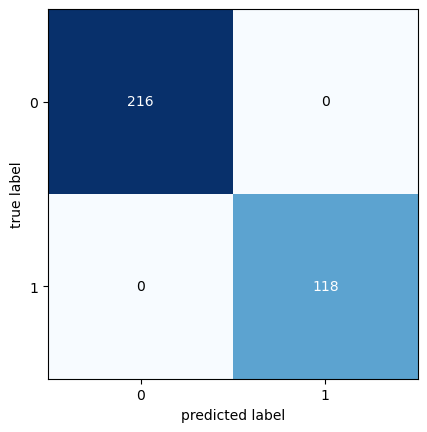

In [183]:
plot_confusion_matrix(cm_train_score)
plt.show()

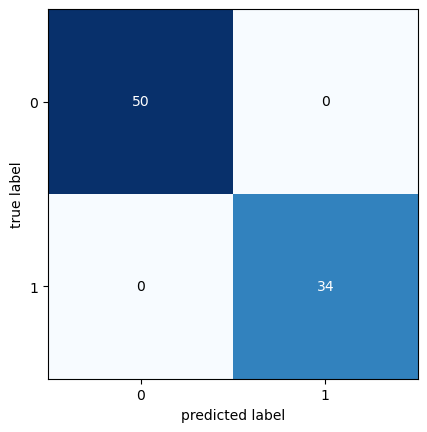

In [188]:
plot_confusion_matrix(cm_test_score)
plt.show()

The logistic regression model has 100% accuracy. This model has correctly predicted all test samples.

### 2.KNN(K-NEAREST  NEIGHBOURS)

In [190]:
from sklearn.neighbors import KNeighborsClassifier

In [191]:
knn_model=KNeighborsClassifier()

In [192]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

### PREDICTION

In [193]:
y_pred_train=knn_model.predict(X_train)

In [194]:
y_pred_train

array([1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 0.

In [195]:
y_pred=knn_model.predict(x_test)

In [196]:
y_pred

array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

### EVALUATION


### TRAINING SCORES

In [197]:
print('Accuracy: ', accuracy_score(y_train, y_pred_train))
print('Precision: ', precision_score(y_train, y_pred_train))
print('Recall: ', recall_score(y_train, y_pred_train))
print('F1 Score: ', f1_score(y_train, y_pred_train))

Accuracy:  0.8203592814371258
Precision:  0.7843137254901961
Recall:  0.6779661016949152
F1 Score:  0.7272727272727273


### TEST SCORES

In [198]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

Accuracy:  0.6666666666666666
Precision:  0.65
Recall:  0.38235294117647056
F1 Score:  0.48148148148148157


The K-Nearest Neighbour model has an accuracy  of 66%.

In [199]:
cm_train_score=confusion_matrix(y_train,y_pred_train)

In [200]:
cm_test_score=confusion_matrix(y_pred,y_test)

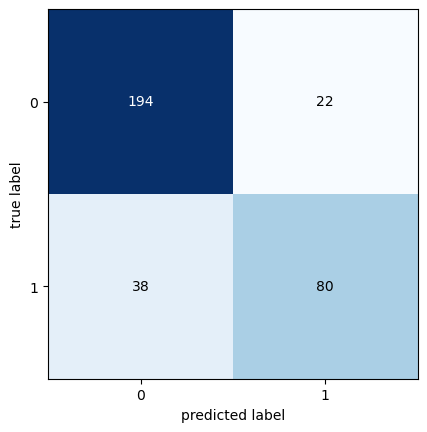

In [201]:
plot_confusion_matrix(cm_train_score)
plt.show()

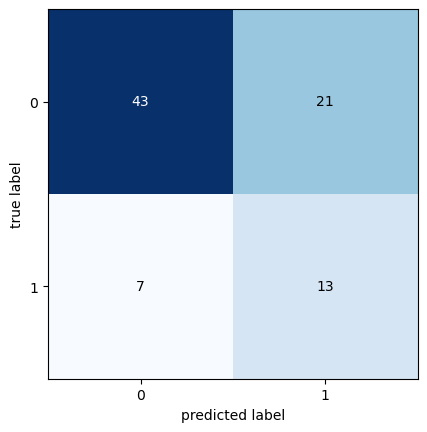

In [202]:
plot_confusion_matrix(cm_test_score)
plt.show()

### 3.SVC(SUPPORT VECTOR CLASSIFIER)

In [203]:
from sklearn.svm import SVC

In [213]:
svc_model=SVC(kernel='linear')

In [214]:
svc_model.fit(X_train,y_train)

SVC(kernel='linear')

### PREDICTION

In [215]:
y_pred_train=svc_model.predict(X_train)

In [216]:
y_pred_train

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 1., 0., 0.

In [217]:
y_pred=svc_model.predict(x_test)

In [218]:
y_pred

array([0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.])

### EVALUATION

### TRAINING SCORES

In [219]:
print('Accuracy: ', accuracy_score(y_train, y_pred_train))
print('Precision: ', precision_score(y_train, y_pred_train))
print('Recall: ', recall_score(y_train, y_pred_train))
print('F1 Score: ', f1_score(y_train, y_pred_train))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


### TEST SCORES

In [220]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


The SVC model has 100% accuracy. This model has correctly predicted all test samples. 

### 4.DECISIONTREE CLASSIFIER

In [221]:
from sklearn.tree import DecisionTreeClassifier

In [222]:
dtc_model=DecisionTreeClassifier()

In [223]:
dtc_model.fit(X_train,y_train)

DecisionTreeClassifier()

### PREDICTION

In [224]:
y_pred_train=dtc_model.predict(X_train)

In [225]:
y_pred_train

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 1., 0., 0.

In [226]:
y_pred=dtc_model.predict(x_test)

In [227]:
y_pred

array([0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.])

### EVALUATION


### TRAINING SCORES

In [228]:
print('Accuracy: ', accuracy_score(y_train, y_pred_train))
print('Precision: ', precision_score(y_train, y_pred_train))
print('Recall: ', recall_score(y_train, y_pred_train))
print('F1 Score: ', f1_score(y_train, y_pred_train))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


### TEST SCORES

In [229]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


The DecisionTree model also giving accuracy score of 100%.

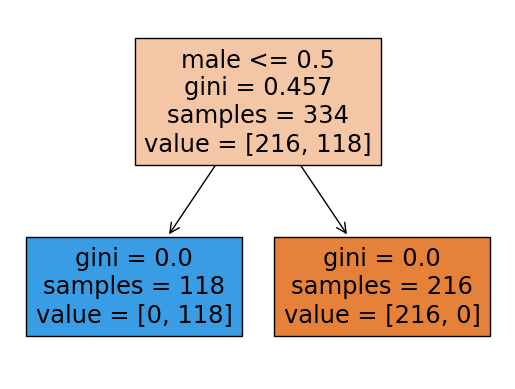

In [240]:
from sklearn.tree import plot_tree
plot_tree(dtc_model, filled=True, feature_names=list(X.columns)) 
plt.show()

### 5.RANDOMFOREST CLASSIFIER

In [230]:
from sklearn.ensemble import RandomForestClassifier

In [231]:
rfc_model=RandomForestClassifier()

In [232]:
rfc_model.fit(X_train,y_train)

RandomForestClassifier()

### PREDICTION

In [233]:
y_pred_train=rfc_model.predict(X_train)

In [234]:
y_pred_train

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 1., 0., 0.

In [235]:
y_pred=rfc_model.predict(x_test)

In [236]:
y_pred

array([0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.])

### EVALUATION

### TRAINING SCORES

In [237]:
print('Accuracy: ', accuracy_score(y_train, y_pred_train))
print('Precision: ', precision_score(y_train, y_pred_train))
print('Recall: ', recall_score(y_train, y_pred_train))
print('F1 Score: ', f1_score(y_train, y_pred_train))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


### TEST SCORES

In [238]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


Accuracy score =100%

In [248]:
round(dataset['Survived'].value_counts(normalize=True)*100, 2)

0    63.64
1    36.36
Name: Survived, dtype: float64

## CONCLUSION


----> There are 36.36% passengers are survived Titanic Disaster ,and 63.64% are died.

---->Most of the passengers are not survived.

---->Total female passengers are survived and male passengers are not survived the disaster.

---->Most of the passengers who are not survived are from class-2 & 3.

---->Most of the passengers who are not survived are from  Southampton.

---->Most of the passemgers who are travelling were having age between 20-40 yeras.

---->The passengers with high fares had more chance of survival.

---->Single passengers with no parents and childrens have less chance to survival.

---->Single passengers with no siblings and spouses have less chance to survival.

---->The Logistic Regression model,  SVC model , DecisionTree and RandomForest model's giving accuracy of 100%.



Finally, this classification Machine Learning models are used to predict whether the passenger is survived or not.